In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import requests
import sys

from pywtk.wtk_api import get_nc_data_from_url


/Users/hsorense/anaconda2/envs/pywtk/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Load interesting sites

In [2]:
import csv
site_data = {}
with open('interesting_sites.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        site_data[row['site_id']] = row

### Pull data for first 10 sites

In [3]:
all_site_ids = site_data.keys()
WTK_URL = "https://h2oq9ul559.execute-api.us-west-2.amazonaws.com/dev"
start = pandas.Timestamp('2013-01-01', tz='utc')
end = pandas.Timestamp('2013-01-31', tz='utc')
utc = True
leap_day = True
attributes = ["power", "wind_speed"]
wind_data = {}
for site in all_site_ids[:10]:
    wind_data[site] = get_nc_data_from_url(WTK_URL+"/met", site, start, end, attributes=attributes, leap_day=leap_day, utc=utc)

In [4]:
wind_data.keys()

['73393',
 '73392',
 '73391',
 '73390',
 '73394',
 '118637',
 '118636',
 '118635',
 '118634',
 '118638']

### Concatenate all data into a single dataframe

In [5]:
for (site_id, site_df) in wind_data.iteritems():
    site_df['site_id'] = site_id
total_df = pandas.concat(wind_data.values())

### Plot power for each site id

site_id
118634    Axes(0.125,0.125;0.775x0.775)
118635    Axes(0.125,0.125;0.775x0.775)
118636    Axes(0.125,0.125;0.775x0.775)
118637    Axes(0.125,0.125;0.775x0.775)
118638    Axes(0.125,0.125;0.775x0.775)
73390     Axes(0.125,0.125;0.775x0.775)
73391     Axes(0.125,0.125;0.775x0.775)
73392     Axes(0.125,0.125;0.775x0.775)
73393     Axes(0.125,0.125;0.775x0.775)
73394     Axes(0.125,0.125;0.775x0.775)
Name: power, dtype: object

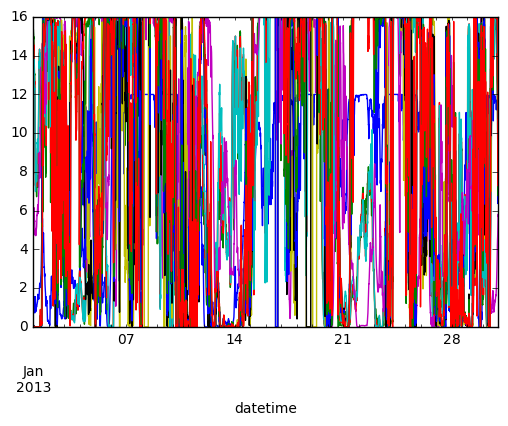

In [6]:
total_df.groupby('site_id')['power'].plot()

### Plot wind speed for each site id

site_id
118634    Axes(0.125,0.125;0.775x0.775)
118635    Axes(0.125,0.125;0.775x0.775)
118636    Axes(0.125,0.125;0.775x0.775)
118637    Axes(0.125,0.125;0.775x0.775)
118638    Axes(0.125,0.125;0.775x0.775)
73390     Axes(0.125,0.125;0.775x0.775)
73391     Axes(0.125,0.125;0.775x0.775)
73392     Axes(0.125,0.125;0.775x0.775)
73393     Axes(0.125,0.125;0.775x0.775)
73394     Axes(0.125,0.125;0.775x0.775)
Name: wind_speed, dtype: object

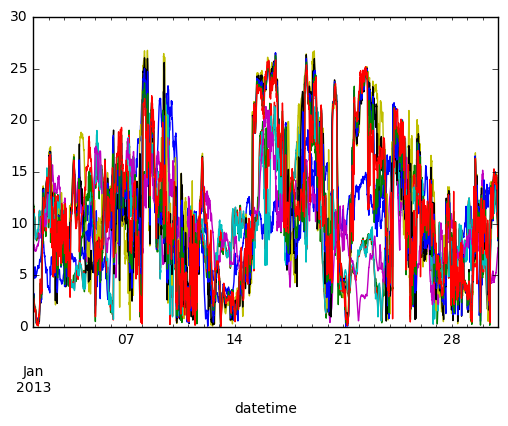

In [7]:
total_df.groupby('site_id')['wind_speed'].plot()